# C치lculo de la frecuencia cardiaca a partir de datos crudos

## Funcionamiento de un pulsioximetro comercial

Un pulsiox칤metro comercial calcula la frecuencia card칤aca (HR) midiendo los cambios en la absorci칩n de luz a trav칠s de un tejido, generalmente un dedo o el l칩bulo de la oreja. Aqu칤 te explico el proceso paso a paso:

### 1. Emisi칩n de Luz y Captura de Se침al
El pulsiox칤metro emite dos longitudes de onda de luz: infrarroja (IR) y roja (RED).

Un fotodiodo detecta cu치nta luz pasa a trav칠s del tejido y cu치nto es absorbido.

La absorci칩n de luz var칤a con el flujo sangu칤neo, ya que la sangre arterial cambia de volumen con cada latido.

### 2. Obtenci칩n de la Se침al Puls치til
La se침al detectada tiene dos componentes:

- Componente de corriente continua (DC): Absorci칩n constante (tejido, sangre venosa, hueso).

- Componente alterno (AC): Absorci칩n puls치til, debido a los cambios en el flujo arterial con cada latido.

El componente AC de la se침al es el que se usa para calcular la frecuencia card칤aca, porque representa los picos de cada latido.

### 3. Detecci칩n de Picos para Calcular HR
Se filtra la se침al para eliminar ruido y obtener solo la componente puls치til.

Se detectan los picos de la onda (cada pico representa un latido).

Se mide el tiempo entre picos sucesivos (intervalo entre latidos, RR interval).

La frecuencia card칤aca se calcula con:

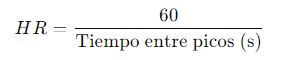
 
Por ejemplo, si el tiempo entre dos picos es 0.8 segundos:

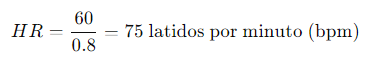

#### 4. Procesamiento Digital
Los pulsiox칤metros comerciales aplican filtros y algoritmos para mejorar la detecci칩n:
- Filtro pasa-bajos: Elimina ruido de alta frecuencia (movimientos, interferencias).
- Filtro pasa-altos: Elimina la se침al DC (absorci칩n constante).
- Algoritmo de detecci칩n de picos: Encuentra los picos m치s relevantes y descarta falsos positivos.

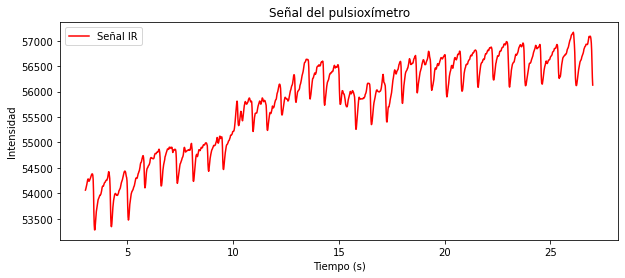

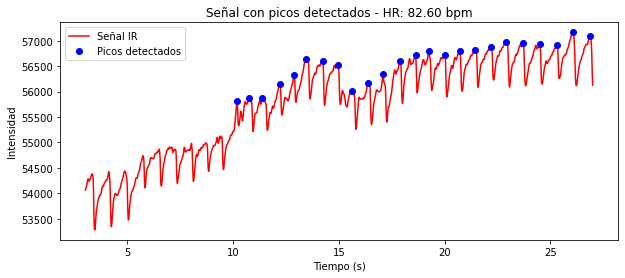

Frecuencia Card칤aca Estimada: 82.60 bpm


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Cargar los datos del CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, delimiter=";")

df = df[(df['Tiempo (ms)'] >= 3000) & (df['Tiempo (ms)'] <= 27000)].reset_index(drop=True)

# Extraer tiempo e intensidad de la se침al IR (o RED)
tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
senal_ir = df['IR']  # Puedes cambiar a 'RED' si prefieres

#  Visualizar la se침al para ver su forma
plt.figure(figsize=(10,4))
plt.plot(tiempo, senal_ir, label="Se침al IR", color='r')
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad")
plt.title("Se침al del pulsiox칤metro")
plt.legend()
plt.show()

#  Detectar los picos de la se침al
picos, _ = find_peaks(senal_ir, distance=30, height=np.mean(senal_ir))  # Ajusta "distance" seg칰n tu se침al

# Calcular la HR a partir del tiempo entre picos
tiempos_entre_picos = np.diff(tiempo[picos])  # Diferencia de tiempo entre picos
frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  # HR en latidos por minuto

#  Mostrar resultados
plt.figure(figsize=(10,4))
plt.plot(tiempo, senal_ir, label="Se침al IR", color='r')
plt.plot(tiempo[picos], senal_ir[picos], "bo", label="Picos detectados")  # Marcar los picos
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad")
plt.title(f"Se침al con picos detectados - HR: {frecuencia_cardiaca:.2f} bpm")
plt.legend()
plt.show()

print(f"Frecuencia Card칤aca Estimada: {frecuencia_cardiaca:.2f} bpm")


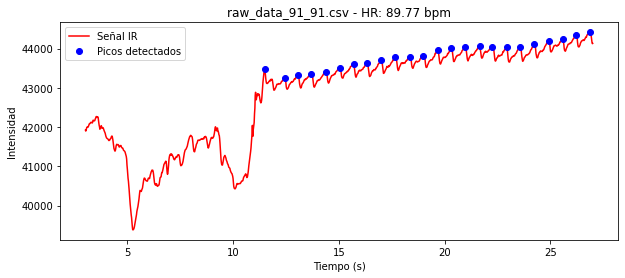

Archivo: raw_data_91_91.csv
Frecuencia Card칤aca Estimada: 89.77 bpm



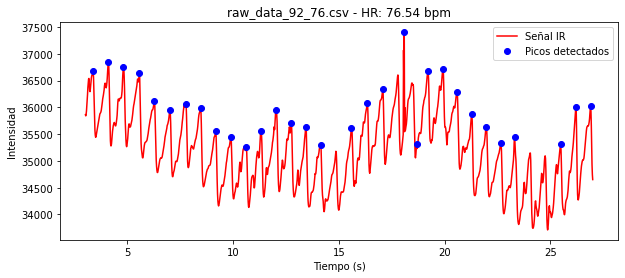

Archivo: raw_data_92_76.csv
Frecuencia Card칤aca Estimada: 76.54 bpm



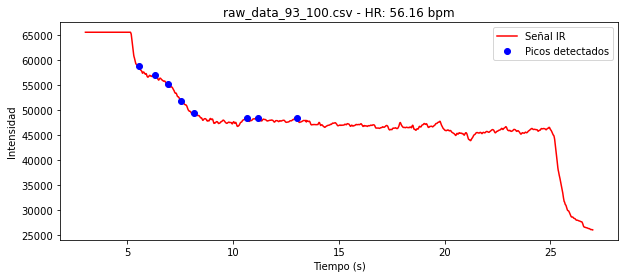

Archivo: raw_data_93_100.csv
Frecuencia Card칤aca Estimada: 56.16 bpm



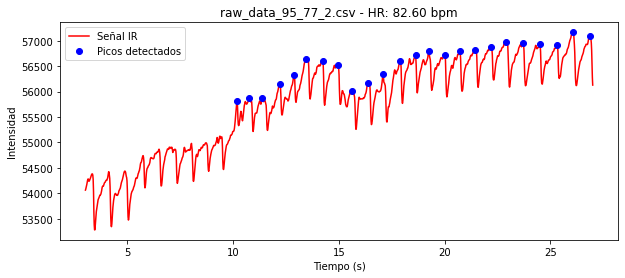

Archivo: raw_data_95_77_2.csv
Frecuencia Card칤aca Estimada: 82.60 bpm



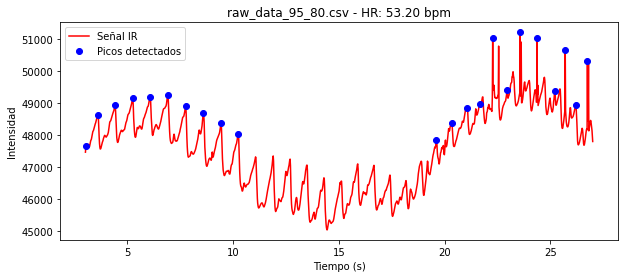

Archivo: raw_data_95_80.csv
Frecuencia Card칤aca Estimada: 53.20 bpm



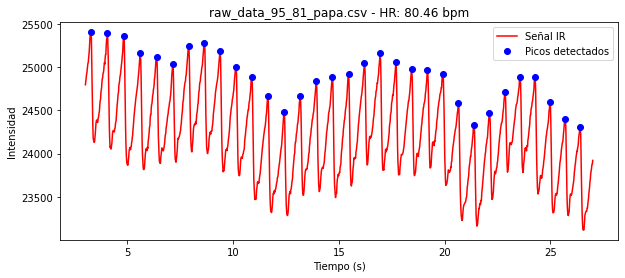

Archivo: raw_data_95_81_papa.csv
Frecuencia Card칤aca Estimada: 80.46 bpm



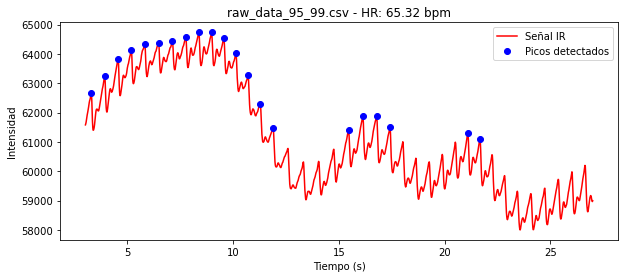

Archivo: raw_data_95_99.csv
Frecuencia Card칤aca Estimada: 65.32 bpm



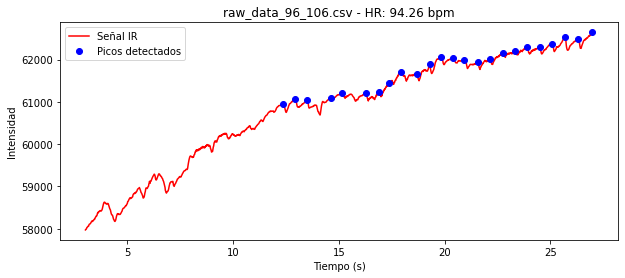

Archivo: raw_data_96_106.csv
Frecuencia Card칤aca Estimada: 94.26 bpm



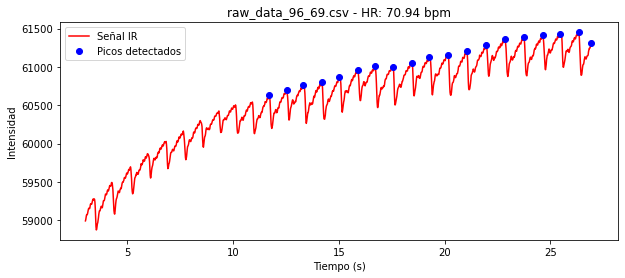

Archivo: raw_data_96_69.csv
Frecuencia Card칤aca Estimada: 70.94 bpm



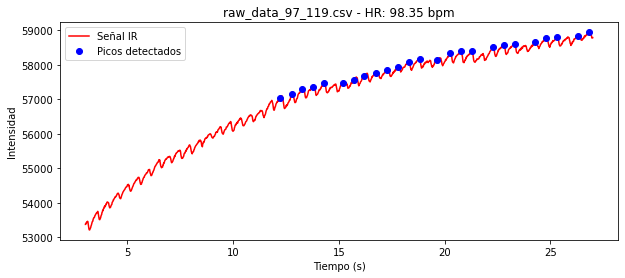

Archivo: raw_data_97_119.csv
Frecuencia Card칤aca Estimada: 98.35 bpm



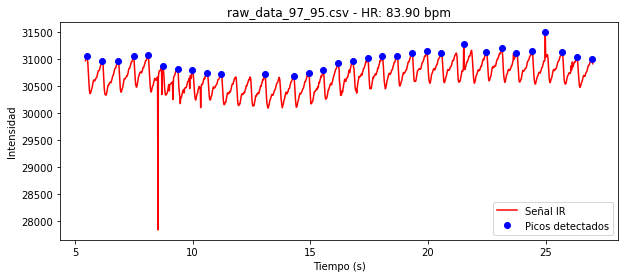

Archivo: raw_data_97_95.csv
Frecuencia Card칤aca Estimada: 83.90 bpm



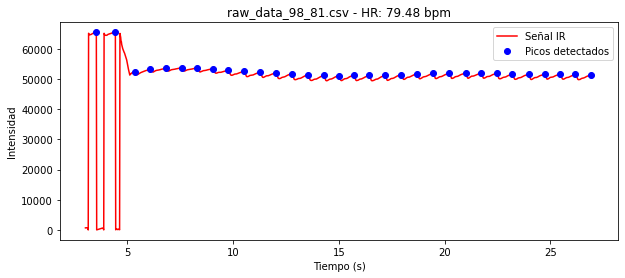

Archivo: raw_data_98_81.csv
Frecuencia Card칤aca Estimada: 79.48 bpm



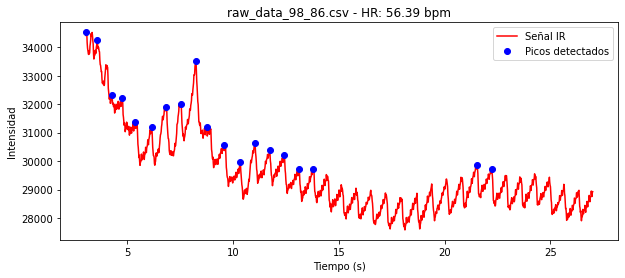

Archivo: raw_data_98_86.csv
Frecuencia Card칤aca Estimada: 56.39 bpm



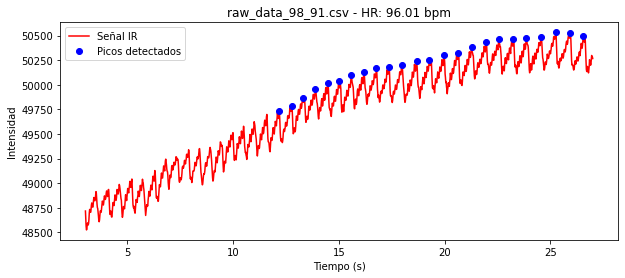

Archivo: raw_data_98_91.csv
Frecuencia Card칤aca Estimada: 96.01 bpm



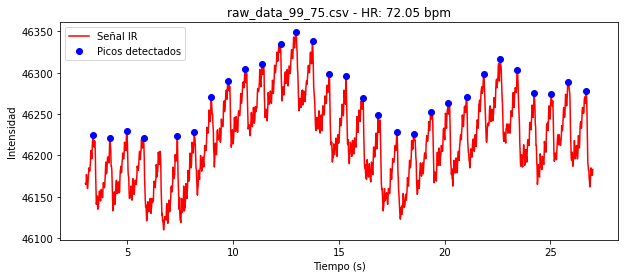

Archivo: raw_data_99_75.csv
Frecuencia Card칤aca Estimada: 72.05 bpm



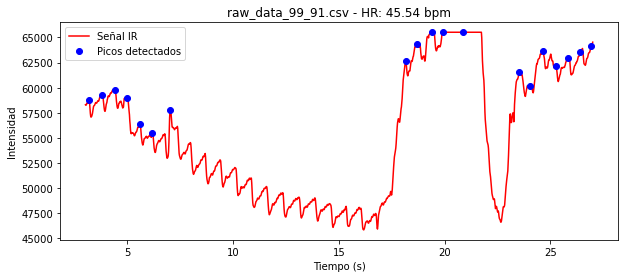

Archivo: raw_data_99_91.csv
Frecuencia Card칤aca Estimada: 45.54 bpm



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

# Definir la ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):  # Asegurar que es un CSV
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        df = df[(df['Tiempo (ms)'] >= 3000) & (df['Tiempo (ms)'] <= 27000)].reset_index(drop=True)
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  # Puedes cambiar a 'RED' si prefieres

        #  Detectar picos en la se침al
        picos, _ = find_peaks(senal_ir, distance=30, height=np.mean(senal_ir))  
        
        if len(picos) > 1:  # Solo calcular si hay m치s de un pico
            tiempos_entre_picos = np.diff(tiempo[picos])  # Intervalos entre picos
            frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  # HR en bpm
        else:
            frecuencia_cardiaca = np.nan  # Si no hay suficientes picos, dejar vac칤o

        #  Graficar se침al con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Se침al IR", color='r')
        plt.plot(tiempo[picos], senal_ir[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado despu칠s de la gr치fica
        if not np.isnan(frecuencia_cardiaca):
            print(f"Archivo: {archivo}")
            print(f"Frecuencia Card칤aca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


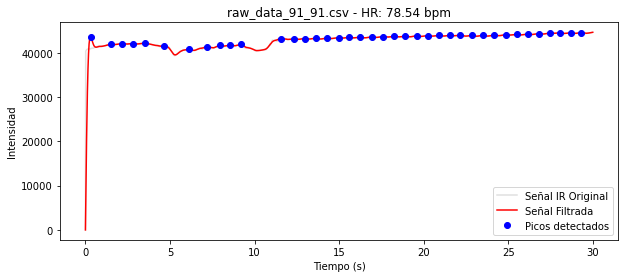

 Archivo: raw_data_91_91.csv
Frecuencia Card칤aca Estimada: 78.54 bpm



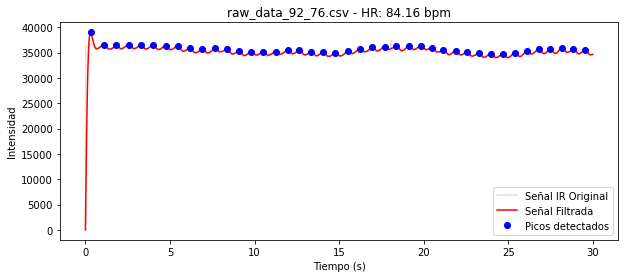

 Archivo: raw_data_92_76.csv
Frecuencia Card칤aca Estimada: 84.16 bpm



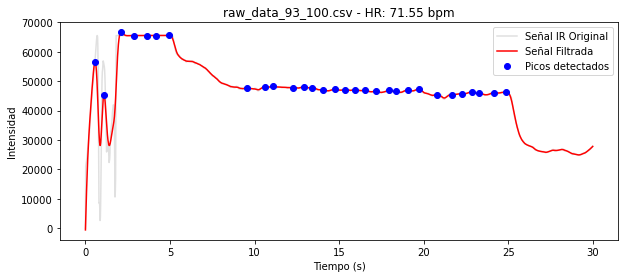

 Archivo: raw_data_93_100.csv
Frecuencia Card칤aca Estimada: 71.55 bpm



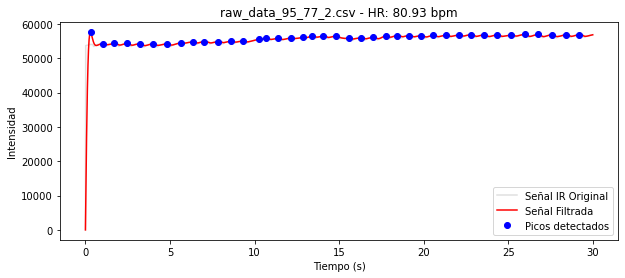

 Archivo: raw_data_95_77_2.csv
Frecuencia Card칤aca Estimada: 80.93 bpm



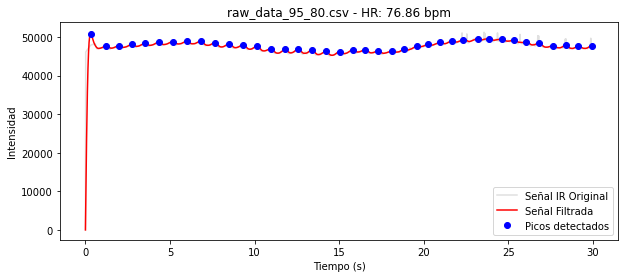

 Archivo: raw_data_95_80.csv
Frecuencia Card칤aca Estimada: 76.86 bpm



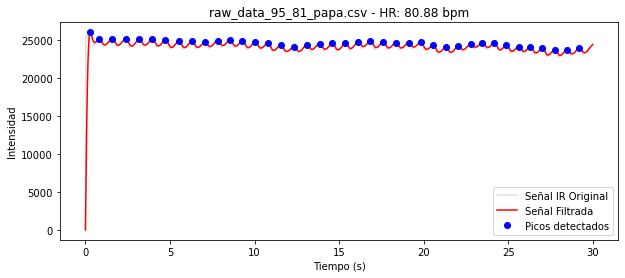

 Archivo: raw_data_95_81_papa.csv
Frecuencia Card칤aca Estimada: 80.88 bpm



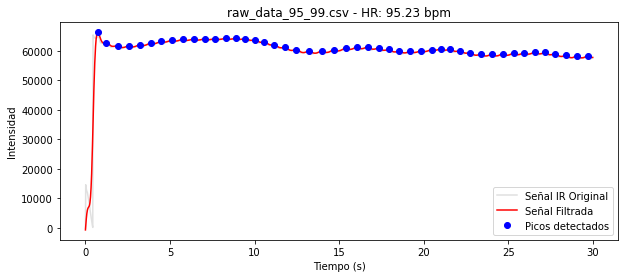

 Archivo: raw_data_95_99.csv
Frecuencia Card칤aca Estimada: 95.23 bpm



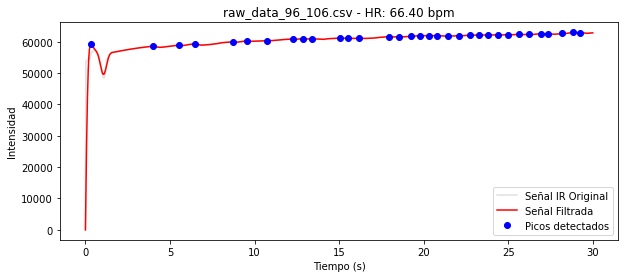

 Archivo: raw_data_96_106.csv
Frecuencia Card칤aca Estimada: 66.40 bpm



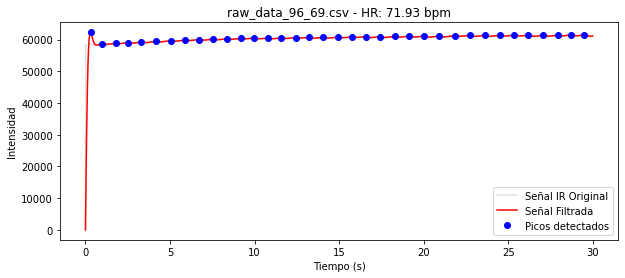

 Archivo: raw_data_96_69.csv
Frecuencia Card칤aca Estimada: 71.93 bpm



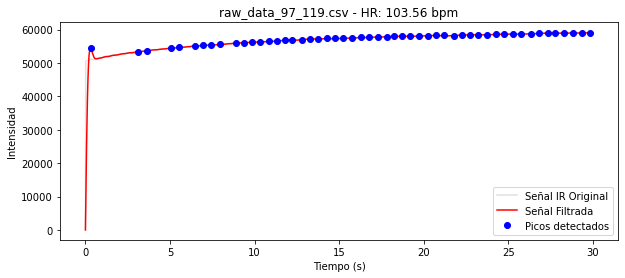

 Archivo: raw_data_97_119.csv
Frecuencia Card칤aca Estimada: 103.56 bpm



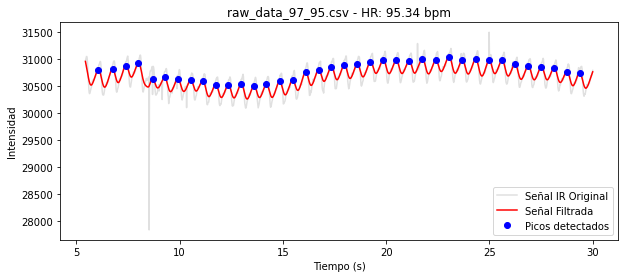

 Archivo: raw_data_97_95.csv
Frecuencia Card칤aca Estimada: 95.34 bpm



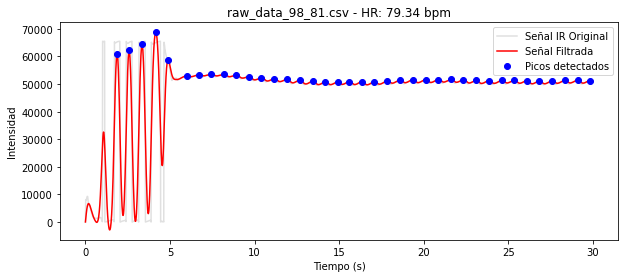

 Archivo: raw_data_98_81.csv
Frecuencia Card칤aca Estimada: 79.34 bpm



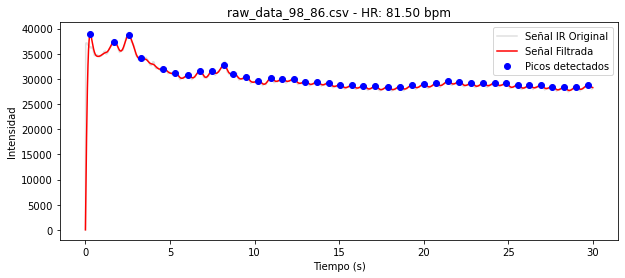

 Archivo: raw_data_98_86.csv
Frecuencia Card칤aca Estimada: 81.50 bpm



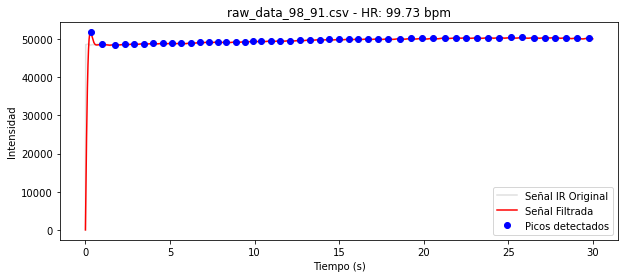

 Archivo: raw_data_98_91.csv
Frecuencia Card칤aca Estimada: 99.73 bpm



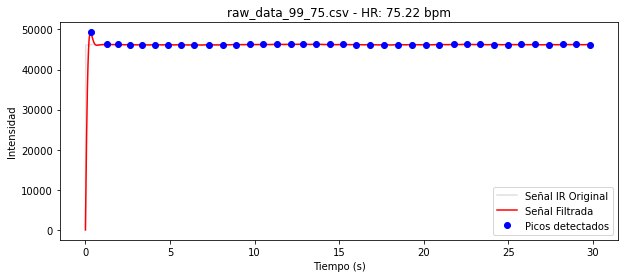

 Archivo: raw_data_99_75.csv
Frecuencia Card칤aca Estimada: 75.22 bpm



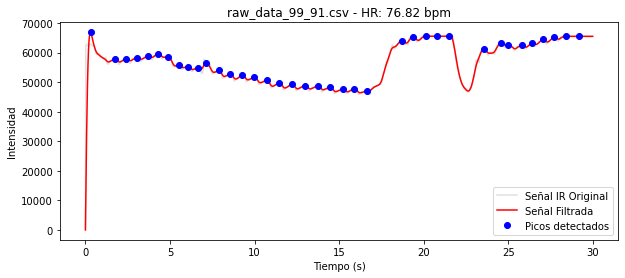

 Archivo: raw_data_99_91.csv
Frecuencia Card칤aca Estimada: 76.82 bpm



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Funci칩n mejorada para filtrar la se침al sin perder demasiada informaci칩n
def filtrar_senal(senal, fs=100, fc=3.0, orden=2):  # 游댳 Subimos la frecuencia de corte y bajamos el orden
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la se침al con el nuevo filtro mejorado
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos con menor distancia m칤nima (20 en vez de 30)
        picos, _ = find_peaks(senal_filtrada, distance=20, height=np.mean(senal_filtrada) * 0.8)  
        
        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar se침al original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Se침al IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Se침al Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado despu칠s de la gr치fica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f"Frecuencia Card칤aca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


Los errores no son completamente aleatorios, pero s칤 hay una tendencia a subestimar las frecuencias m치s altas y sobreestimar algunas m치s bajas.

1. Puede que a칰n se pierdan algunos picos reales
-  Ajustar height en find_peaks() de manera din치mica, en lugar de usar un umbral fijo.
- Prueba: Ajustar height=np.percentile(senal_filtrada, 75).

2. Ruido que afecta la detecci칩n de intervalos RR
-  Usar un filtro m치s refinado con un enfoque de suavizado adaptativo.

3. Latidos irregulares o cambios en la amplitud
- Excluir outliers en los intervalos RR para evitar errores en la media.
- Prueba: Aplicar un filtro IQR (Interquartile Range) en los RR-intervals.

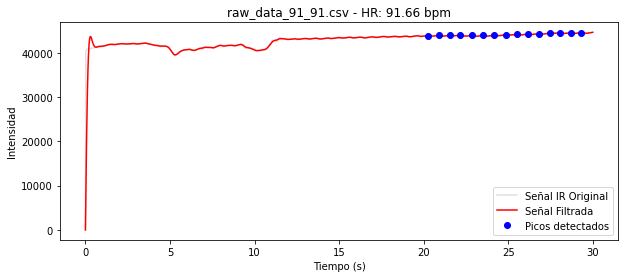

 Archivo: raw_data_91_91.csv
 Frecuencia Card칤aca Estimada: 91.66 bpm



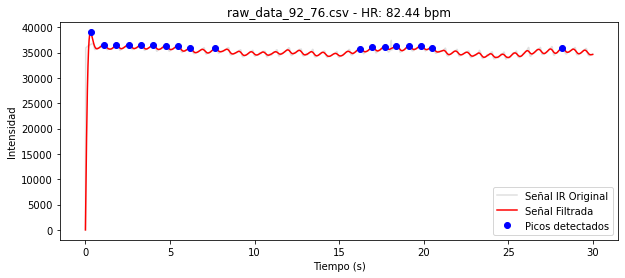

 Archivo: raw_data_92_76.csv
 Frecuencia Card칤aca Estimada: 82.44 bpm



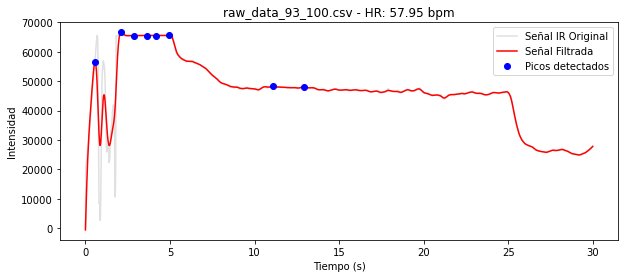

 Archivo: raw_data_93_100.csv
 Frecuencia Card칤aca Estimada: 57.95 bpm



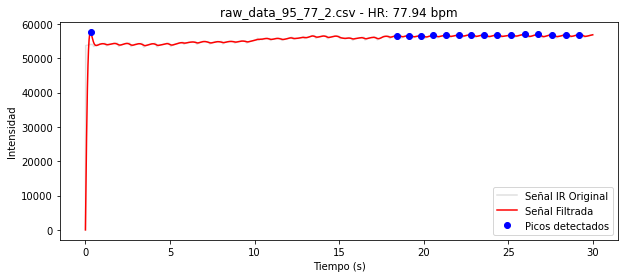

 Archivo: raw_data_95_77_2.csv
 Frecuencia Card칤aca Estimada: 77.94 bpm



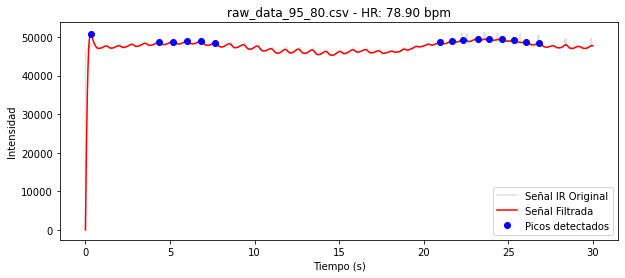

 Archivo: raw_data_95_80.csv
 Frecuencia Card칤aca Estimada: 78.90 bpm



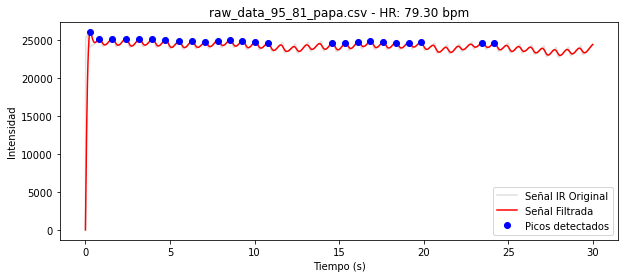

 Archivo: raw_data_95_81_papa.csv
 Frecuencia Card칤aca Estimada: 79.30 bpm



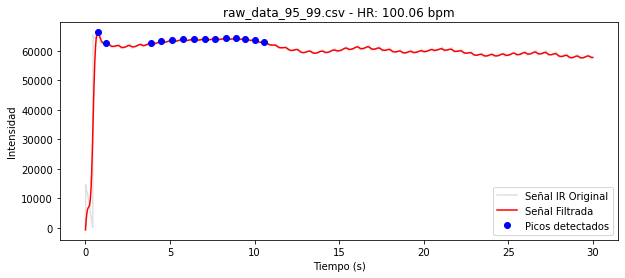

 Archivo: raw_data_95_99.csv
 Frecuencia Card칤aca Estimada: 100.06 bpm



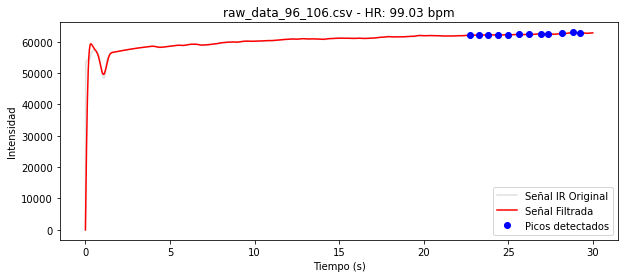

 Archivo: raw_data_96_106.csv
 Frecuencia Card칤aca Estimada: 99.03 bpm



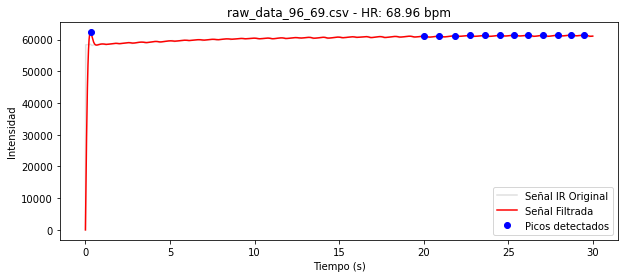

 Archivo: raw_data_96_69.csv
 Frecuencia Card칤aca Estimada: 68.96 bpm



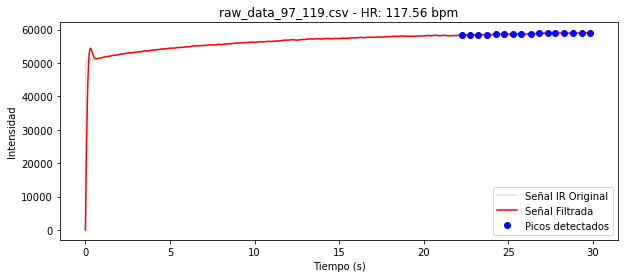

 Archivo: raw_data_97_119.csv
 Frecuencia Card칤aca Estimada: 117.56 bpm



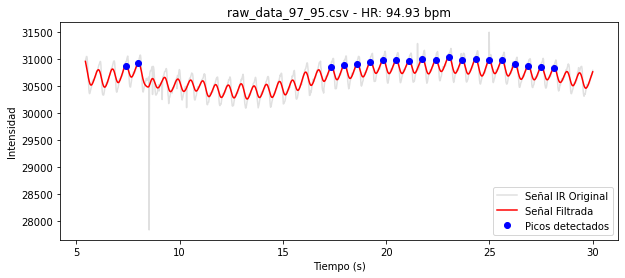

 Archivo: raw_data_97_95.csv
 Frecuencia Card칤aca Estimada: 94.93 bpm



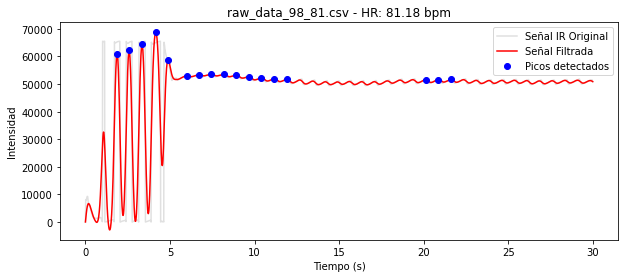

 Archivo: raw_data_98_81.csv
 Frecuencia Card칤aca Estimada: 81.18 bpm



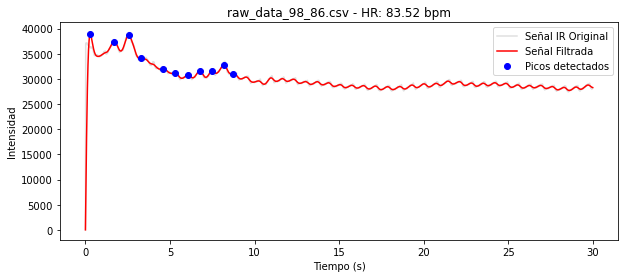

 Archivo: raw_data_98_86.csv
 Frecuencia Card칤aca Estimada: 83.52 bpm



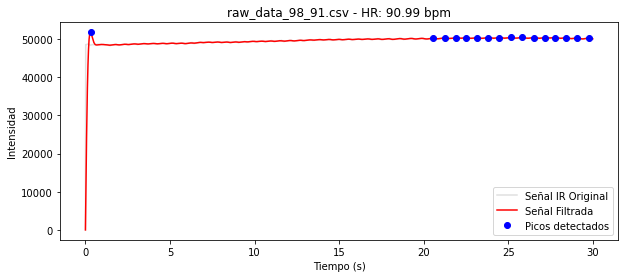

 Archivo: raw_data_98_91.csv
 Frecuencia Card칤aca Estimada: 90.99 bpm



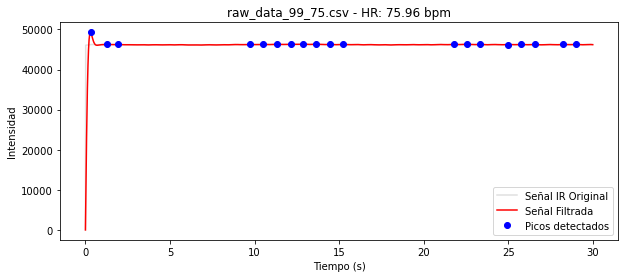

 Archivo: raw_data_99_75.csv
 Frecuencia Card칤aca Estimada: 75.96 bpm



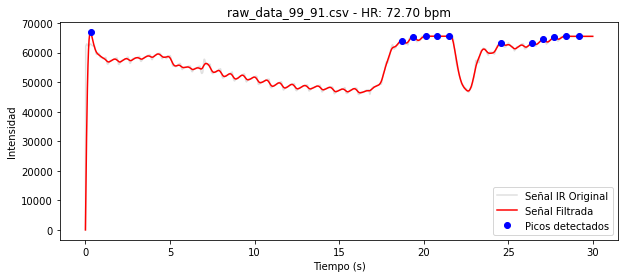

 Archivo: raw_data_99_91.csv
 Frecuencia Card칤aca Estimada: 72.70 bpm



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Funci칩n para filtrar la se침al sin perder demasiada informaci칩n
def filtrar_senal(senal, fs=100, fc=3.0, orden=2):
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Funci칩n para eliminar outliers en los intervalos RR
def filtrar_rr_intervals(rr_intervals):
    q1, q3 = np.percentile(rr_intervals, [25, 75])
    iqr = q3 - q1
    limite_inf, limite_sup = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return rr_intervals[(rr_intervals > limite_inf) & (rr_intervals < limite_sup)]

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la se침al
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos ajustando height din치micamente
        height_umbral = np.percentile(senal_filtrada, 75)  # 75% de la se침al
        picos, _ = find_peaks(senal_filtrada, distance=20, height=height_umbral)  

        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            
            # Filtrar los RR-intervals eliminando outliers
            tiempos_entre_picos = filtrar_rr_intervals(tiempos_entre_picos)

            if len(tiempos_entre_picos) > 0:
                frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)
            else:
                frecuencia_cardiaca = np.nan
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar se침al original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Se침al IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Se침al Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado despu칠s de la gr치fica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f" Frecuencia Card칤aca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f" Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


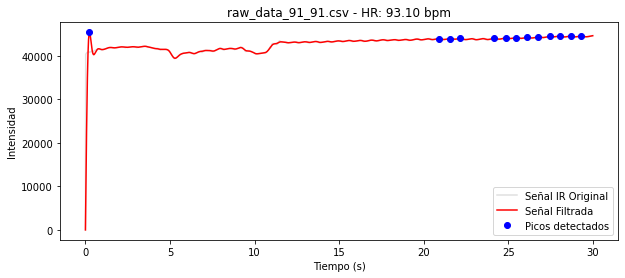

 Archivo: raw_data_91_91.csv
 Frecuencia Card칤aca Estimada: 93.10 bpm



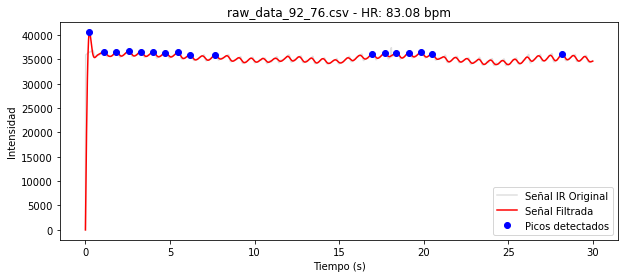

 Archivo: raw_data_92_76.csv
 Frecuencia Card칤aca Estimada: 83.08 bpm



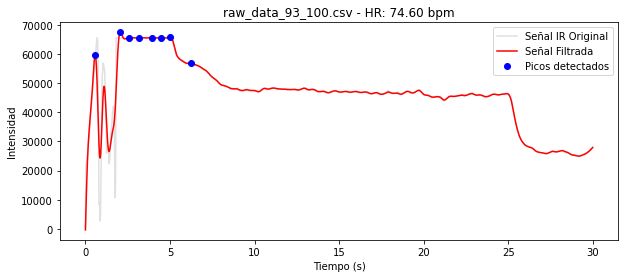

 Archivo: raw_data_93_100.csv
 Frecuencia Card칤aca Estimada: 74.60 bpm



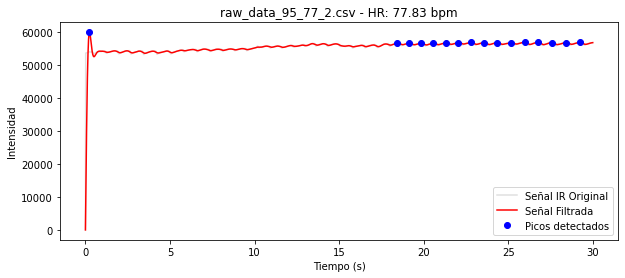

 Archivo: raw_data_95_77_2.csv
 Frecuencia Card칤aca Estimada: 77.83 bpm



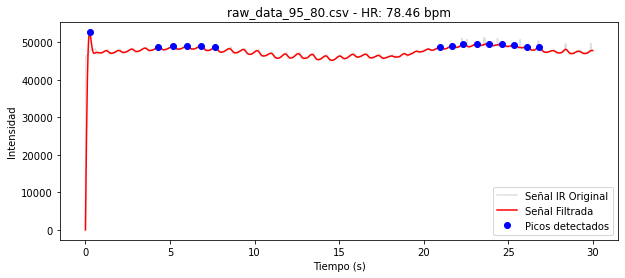

 Archivo: raw_data_95_80.csv
 Frecuencia Card칤aca Estimada: 78.46 bpm



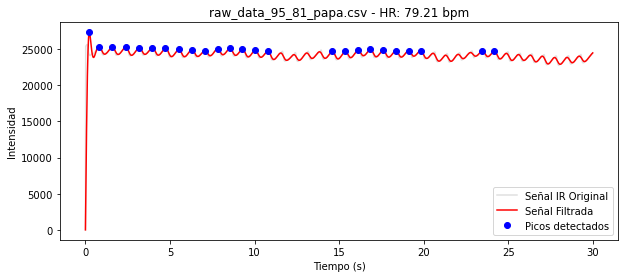

 Archivo: raw_data_95_81_papa.csv
 Frecuencia Card칤aca Estimada: 79.21 bpm



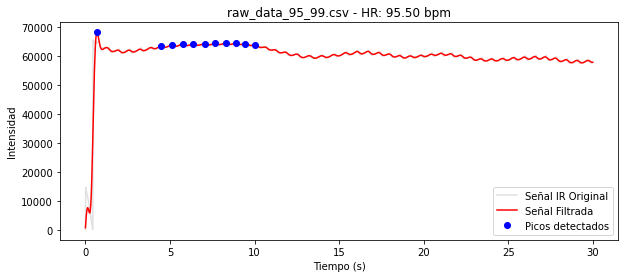

 Archivo: raw_data_95_99.csv
 Frecuencia Card칤aca Estimada: 95.50 bpm



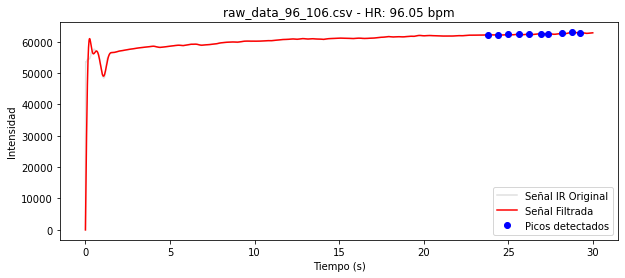

 Archivo: raw_data_96_106.csv
 Frecuencia Card칤aca Estimada: 96.05 bpm



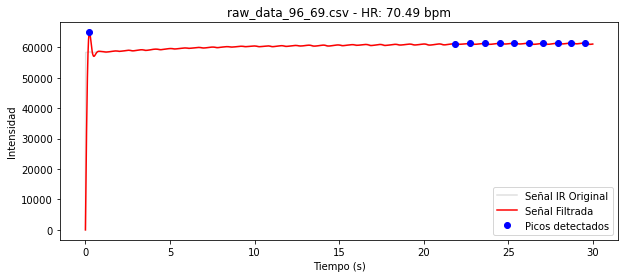

 Archivo: raw_data_96_69.csv
 Frecuencia Card칤aca Estimada: 70.49 bpm



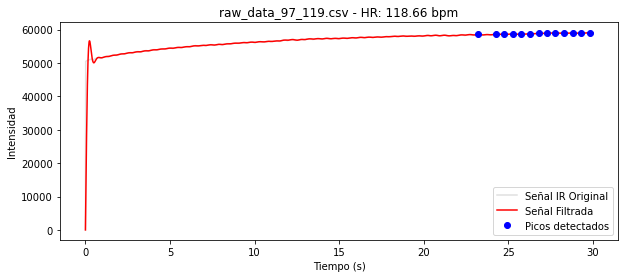

 Archivo: raw_data_97_119.csv
 Frecuencia Card칤aca Estimada: 118.66 bpm



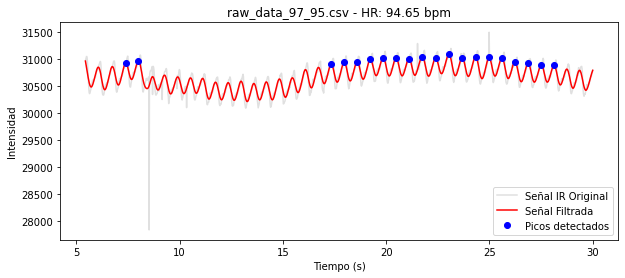

 Archivo: raw_data_97_95.csv
 Frecuencia Card칤aca Estimada: 94.65 bpm



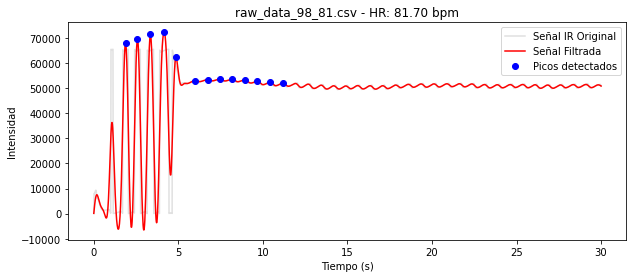

 Archivo: raw_data_98_81.csv
 Frecuencia Card칤aca Estimada: 81.70 bpm



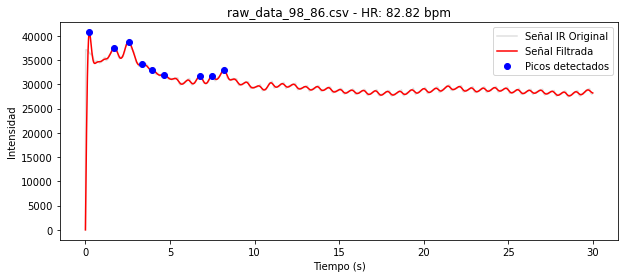

 Archivo: raw_data_98_86.csv
 Frecuencia Card칤aca Estimada: 82.82 bpm



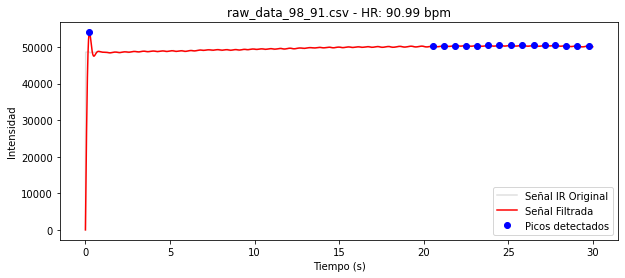

 Archivo: raw_data_98_91.csv
 Frecuencia Card칤aca Estimada: 90.99 bpm



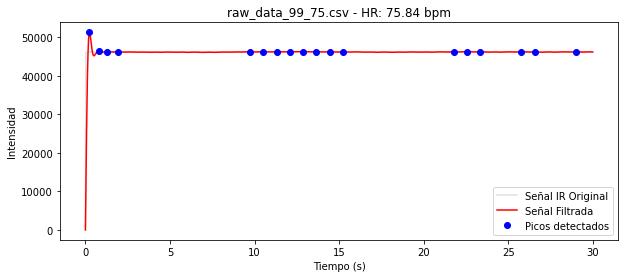

 Archivo: raw_data_99_75.csv
 Frecuencia Card칤aca Estimada: 75.84 bpm



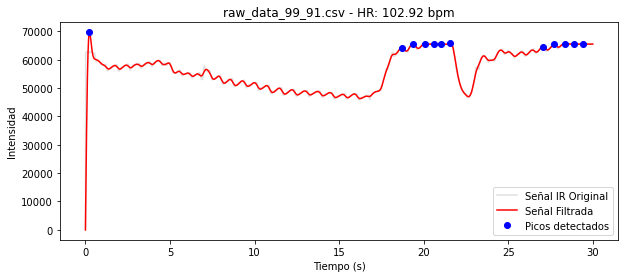

 Archivo: raw_data_99_91.csv
 Frecuencia Card칤aca Estimada: 102.92 bpm



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Funci칩n mejorada para filtrar la se침al
def filtrar_senal(senal, fs=100, fc=3.5, orden=3):  # 游댳 Subimos fc a 3.5 Hz y el orden a 3
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Funci칩n para eliminar outliers en los intervalos RR
def filtrar_rr_intervals(rr_intervals):
    q1, q3 = np.percentile(rr_intervals, [25, 75])
    iqr = q3 - q1
    limite_inf, limite_sup = q1 - 1.2 * iqr, q3 + 1.2 * iqr  # 游댳 M치s estricto en la eliminaci칩n de outliers
    return rr_intervals[(rr_intervals > limite_inf) & (rr_intervals < limite_sup)]

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la se침al
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos con ajustes finos
        height_umbral = np.percentile(senal_filtrada, 80)  # 游댳 Subimos a percentil 80
        picos, _ = find_peaks(senal_filtrada, distance=18, height=height_umbral)  # 游댳 Bajamos distance a 18  

        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            
            # Filtrar los RR-intervals eliminando outliers
            tiempos_entre_picos = filtrar_rr_intervals(tiempos_entre_picos)

            if len(tiempos_entre_picos) > 0:
                frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)
            else:
                frecuencia_cardiaca = np.nan
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar se침al original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Se침al IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Se침al Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado despu칠s de la gr치fica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f" Frecuencia Card칤aca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print("No se detectaron suficientes picos para calcular la HR.\n")
